In [1]:
# Script was originally run using Python 3
# Run the following command in Terminal to install HDDM package
# conda install -c pymc hddm

import hddm
print("HDDM version: "+ hddm.__version__)

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
print("Numpy version: "+ np.__version__) # version <=1.11 necessary for pymc2 (https://groups.google.com/forum/#!topic/hddm-users/Jdwm_IoJk5U)

import scipy.io as io

import warnings
warnings.filterwarnings('ignore')
print("Important: Warnings disabled for improved clarity")

import pickle

def savePatch(self, fname):
    with open(fname, 'wb') as f:
        pickle.dump(self, f)


/Users/kosciessa/anaconda3/envs/py35/lib/python3.5/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


HDDM version: 0.6.0
Numpy version: 1.14.0
Important: Warnings disabled for improved clarity


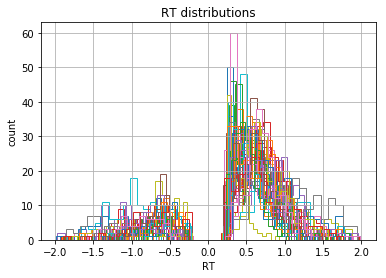

In [2]:
# get data from numpy structured array

group = 'YA'

dataPath = '/Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/';
csvData = dataPath+'StateSwitchDynamicTrialData_EEG_'+group+'_TargetAgreement.dat';

savePath = '/Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/EEGAgree/'

########################
## Load and flip data ##
########################

data = hddm.load_csv(csvData)
data.rename(columns={'acc':'response'}, inplace=True)
data.rename(columns={'subject':'subj_idx'}, inplace=True)

dataFlipped = hddm.utils.flip_errors(data)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in dataFlipped.groupby('subj_idx'):
    subj_data.rt.hist(bins=40, histtype='step', ax=ax)
    

In [3]:
is_agree = data.agree == 1
is_l4 = data.dim == 4

data[data.agree == 6]

subj_idx  response       rt  agree  dim  att  age    ID
0             1         1  0.72165      6    2    1    1  1117
1             1         1  0.82361      6    2    2    1  1117
3             1         0  1.48840      6    2    2    1  1117
4             1         0  0.92432      6    2    2    1  1117
7             1         1  0.93956      6    2    1    1  1117
8             1         1  0.61344      6    1    2    1  1117
9             1         1  0.35636      6    1    2    1  1117
10            1         1  0.55931      6    1    2    1  1117
11            1         1  0.36126      6    1    2    1  1117
12            1         1  0.53218      6    1    2    1  1117
13            1         1  0.30308      6    1    2    1  1117
14            1         1  0.37306      6    1    2    1  1117
15            1         1  0.33796      6    1    2    1  1117
21            1         1  1.55250      6    3    4    1  1117
31            1         0  0.51561      6    3    1    1  1117
35            1         1  0.70839      6    3    1    1  1117
37            1         1  1.24830      6    3    2    1  1117
38            1         1  0.63018      6    3    4    1  1117
42            1         1  0.95596      6    4    3    1  1117
47            1         1  0.80453      6    2    4    1  1117
50            1         1  0.25835      6    2    4    1  1117
51            1         1  0.41527      6    2    3    1  1117
52            1         1  0.46321      6    2    4    1  1117
53            1         1  0.31115      6    2    3    1  1117
55            1         1  0.25397      6    1    4    1  1117
56            1         1  0.28291      6    1    4    1  1117
57            1         1  0.49978      6    1    4    1  1117
58            1         1  0.31678      6    1    4    1  1117
59            1         1  0.32371      6    1    4    1  1117
60            1         1  0.40765      6    1    4    1  1117
...         ...       ...      ...    ...  ...  ...  ...   ...
11628        49         1  0.61787      6    2    2    1  1281
11630        49         1  1.25570      6    2    3    1  1281
11633        49         1  0.73465      6    2    3    1  1281
11634        49         1  0.60850      6    2    3    1  1281
11644        49         1  0.62476      6    1    4    1  1281
11645        49         1  0.67064      6    1    4    1  1281
11646        49         0  0.67885      6    1    4    1  1281
11647        49         1  0.47756      6    1    4    1  1281
11648        49         0  0.61659      6    1    4    1  1281
11649        49         0  1.08840      6    1    4    1  1281
11650        49         1  0.58039      6    1    4    1  1281
11651        49         1  0.61830      6    1    4    1  1281
11656        49         1  0.61395      6    2    1    1  1281
11657        49         0  0.87588      6    2    3    1  1281
11659        49         1  0.67976      6    2    1    1  1281
11660        49         1  0.68278      6    3    2    1  1281
11663        49         1  0.99944      6    3    1    1  1281
11665        49         1  0.79724      6    3    1    1  1281
11667        49         1  1.00220      6    3    4    1  1281
11669        49         1  0.87603      6    4    3    1  1281
11674        49         1  0.60970      6    4    1    1  1281
11675        49         1  0.68369      6    4    2    1  1281
11676        49         1  0.32548      6    1    1    1  1281
11677        49         1  0.66246      6    1    1    1  1281
11678        49         1  0.51345      6    1    1    1  1281
11679        49         1  0.58771      6    1    1    1  1281
11680        49         1  0.59754      6    1    1    1  1281
11681        49         1  0.42654      6    1    1    1  1281
11682        49         1  0.66648      6    1    1    1  1281
11683        49         0  0.54142      6    1    1    1  1281

[5366 rows x 8 columns]

In [4]:
#m_stim_v_a_t_byAge.print_stats()

Run additional models with fewer parameters, as indicated by EEG

In [5]:
m_dim_agree_v_t = hddm.HDDM(data, depends_on={'v': ['dim', 'agree'], 't': ['dim', 'agree']}, p_outlier=.05)
m_dim_agree_v_t.find_starting_values()
m_dim_agree_v_t.sample(7000, burn=5000, dbname='traces.db', db='pickle')
print('Model m_stim_v_t will be saved at: '+ savePath+'m_dim_agree_v_t')
m_dim_agree_v_t.savePatch = savePatch(m_dim_agree_v_t, savePath+'m_dim_agree_v_t')
# save individual results as CSV
dataMat = m_dim_agree_v_t.get_traces()
fileName = 'm_dim_agree_v_t.csv'
print('Data will be saved at: '+ savePath+fileName)
dataMat.to_csv(savePath+fileName, sep='\t')

 [-----------------100%-----------------] 7001 of 7000 complete in 2025.4 secModel m_stim_v_t will be saved at: /Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/EEGAgree/m_dim_agree_v_t
Data will be saved at: /Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/EEGAgree/m_dim_agree_v_t.csv


In [6]:
#m_dim_agree_v_t = pickle.load(open(savePath+'m_dim_agree_v_t', 'rb'))

Plotting a
Plotting a_std
Plotting v(1.2)
Plotting v(1.4)
Plotting v(2.1)
Plotting v(2.2)
Plotting v(2.3)
Plotting v(3.1)
Plotting v(3.2)
Plotting v(3.3)
Plotting v(3.4)
Plotting v(4.1)
Plotting v(4.2)
Plotting v(4.3)
Plotting v(5.1)
Plotting v(5.2)
Plotting v(5.3)
Plotting v(5.4)
Plotting v(6.1)
Plotting v(6.2)
Plotting v(6.3)
Plotting v(6.4)
Plotting v_std
Plotting t(1.2)
Plotting t(1.4)
Plotting t(2.1)
Plotting t(2.2)
Plotting t(2.3)
Plotting t(3.1)
Plotting t(3.2)
Plotting t(3.3)
Plotting t(3.4)
Plotting t(4.1)
Plotting t(4.2)
Plotting t(4.3)
Plotting t(5.1)
Plotting t(5.2)
Plotting t(5.3)
Plotting t(5.4)
Plotting t(6.1)
Plotting t(6.2)
Plotting t(6.3)
Plotting t(6.4)
Plotting t_std


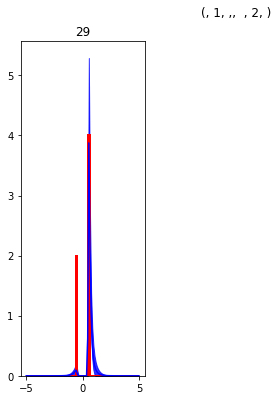

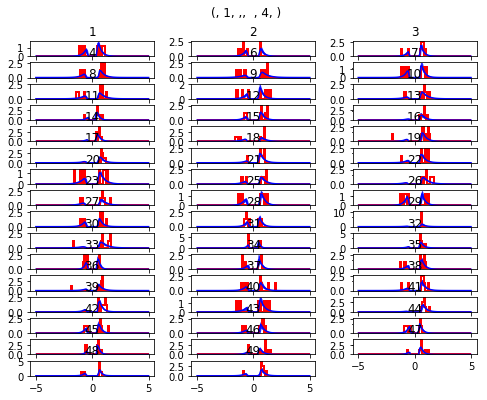

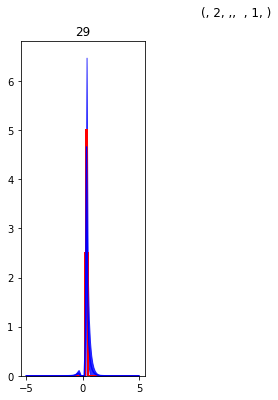

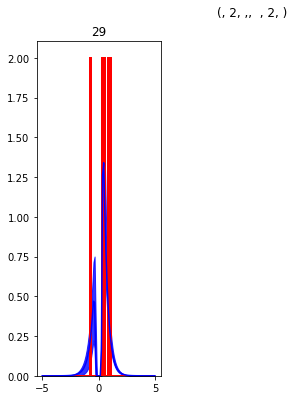

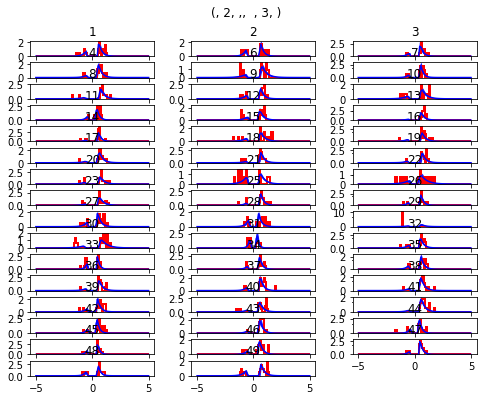

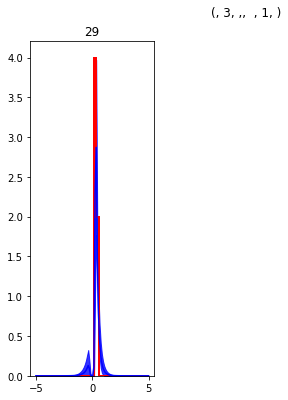

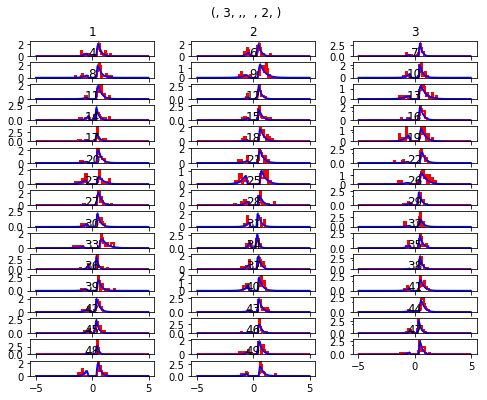

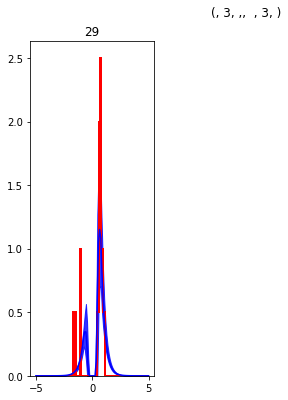

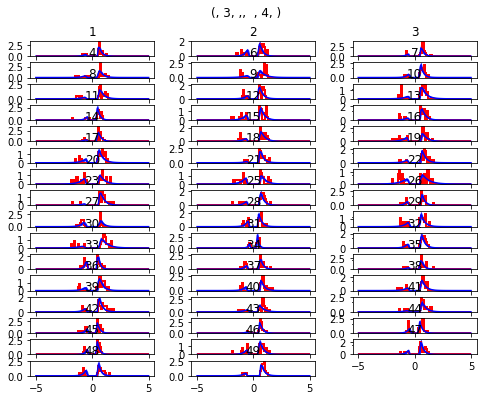

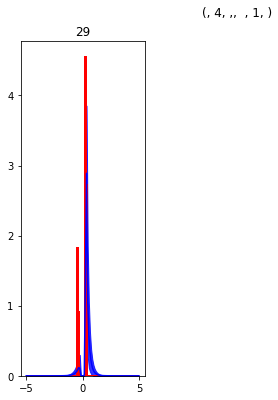

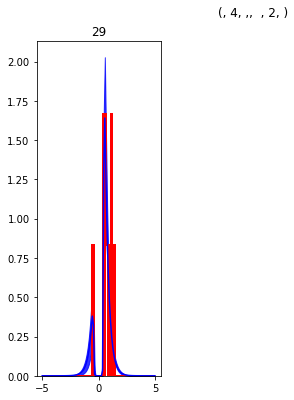

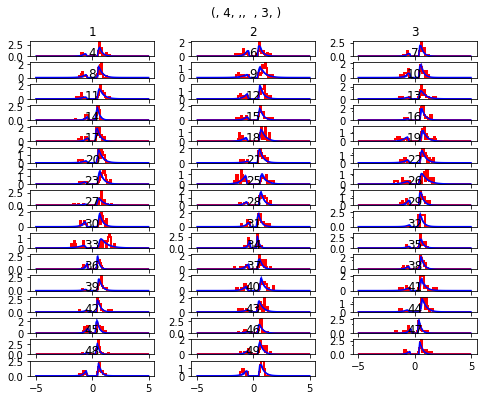

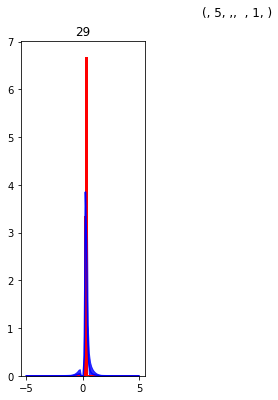

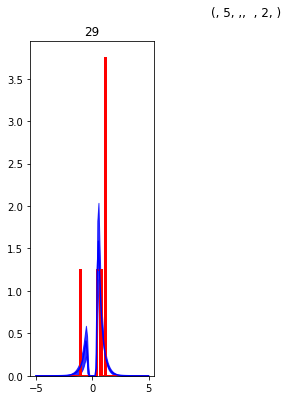

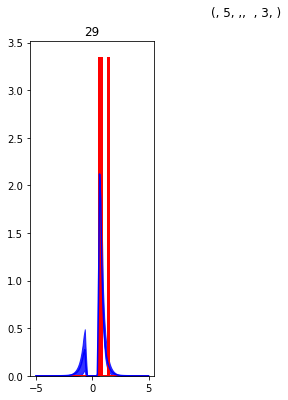

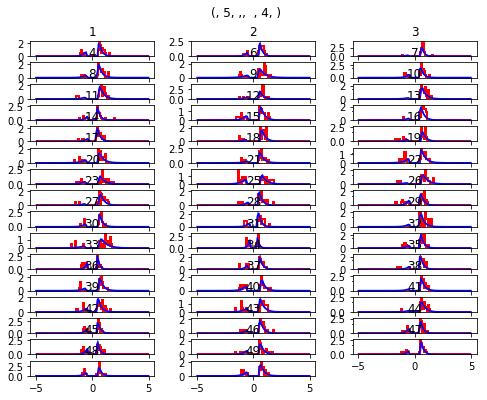

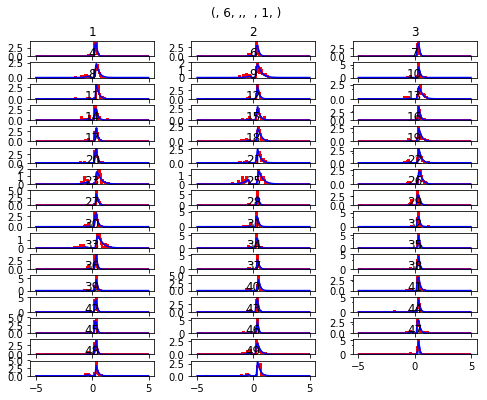

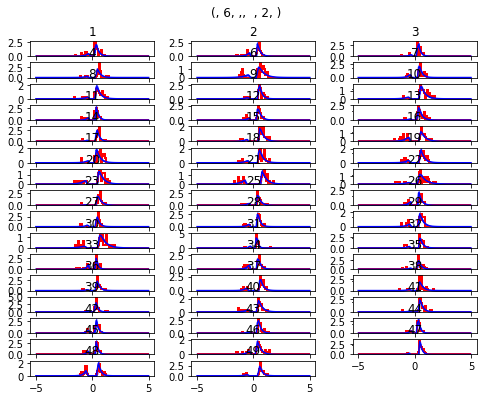

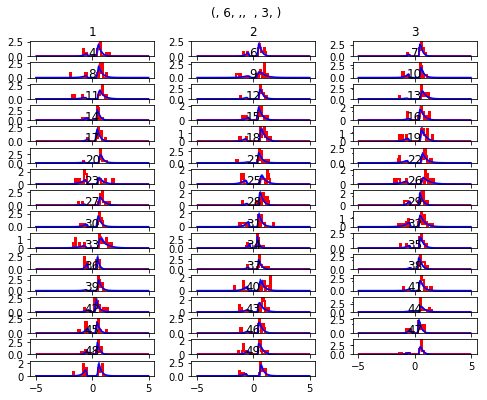

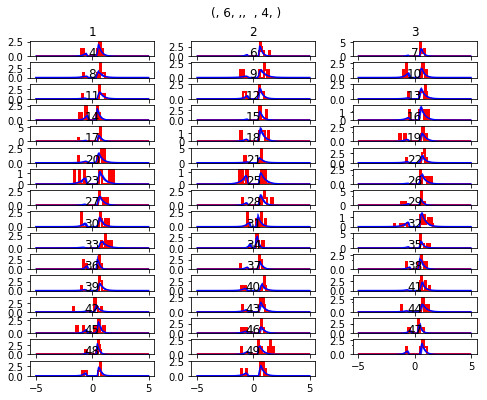

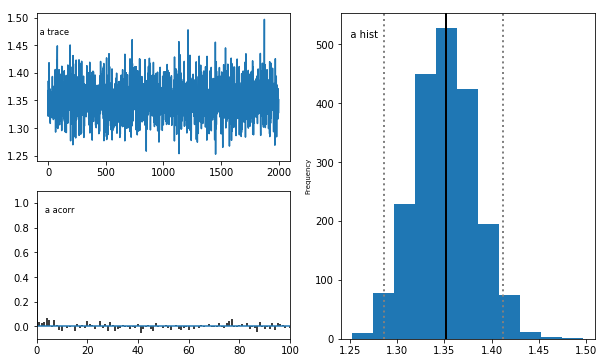

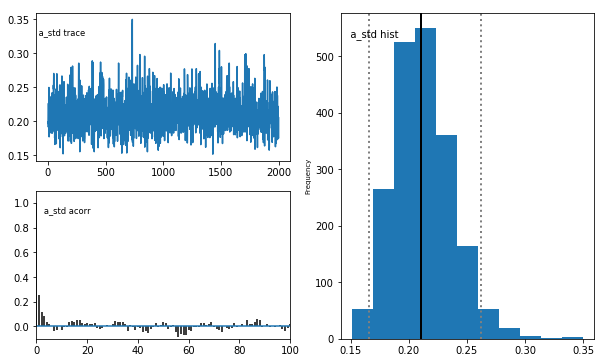

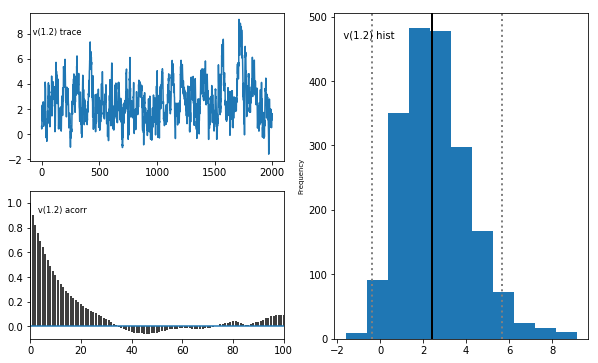

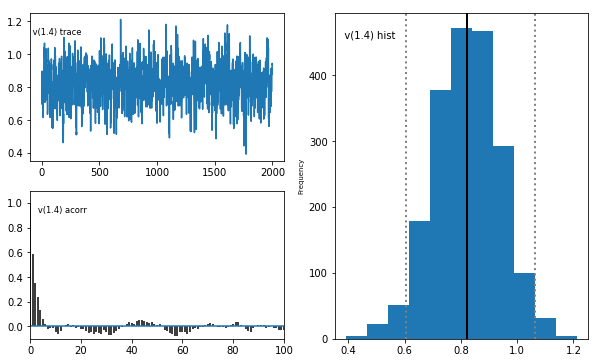

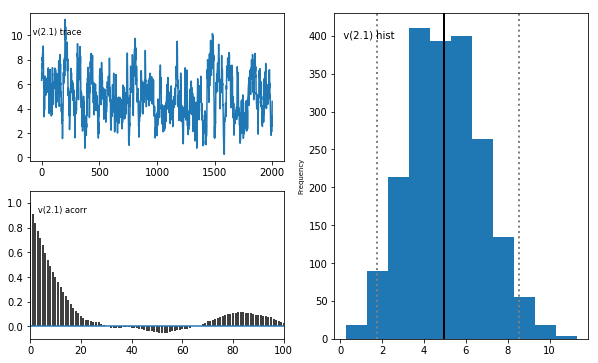

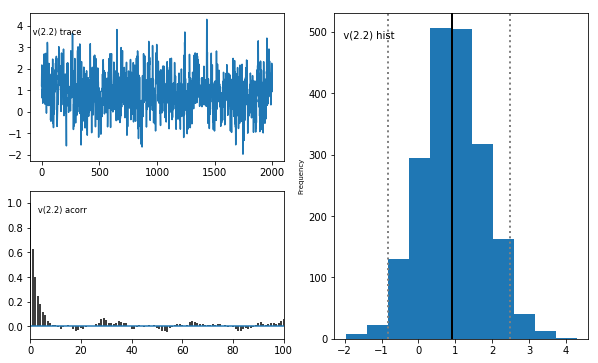

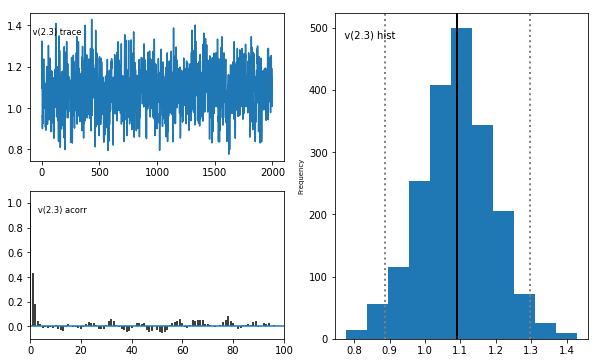

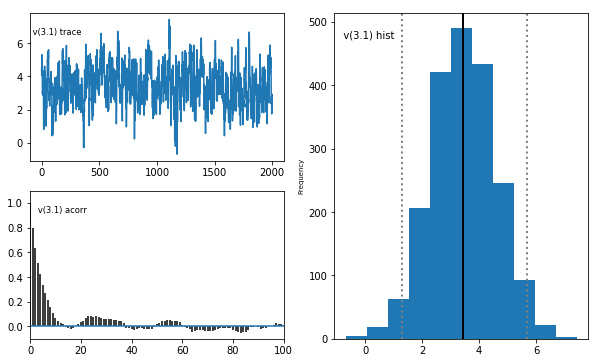

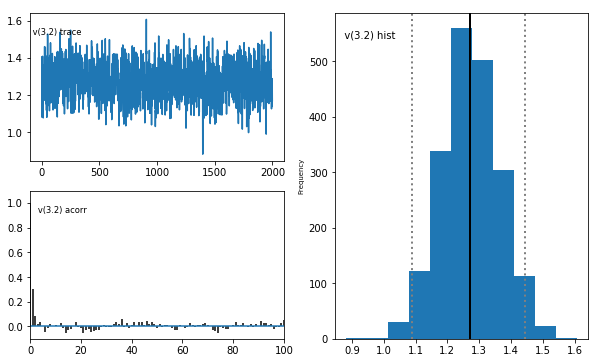

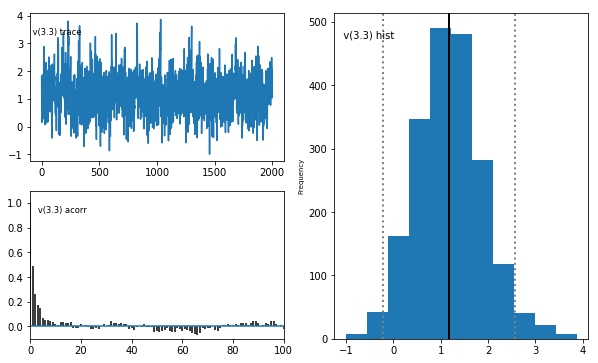

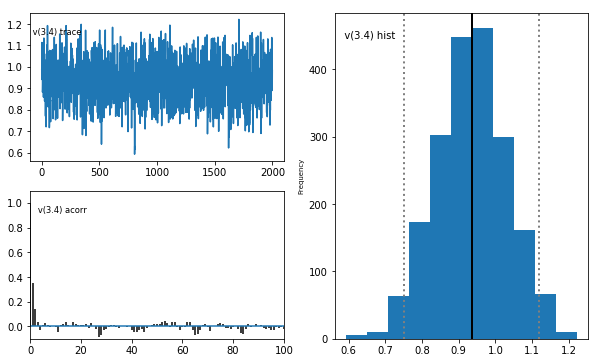

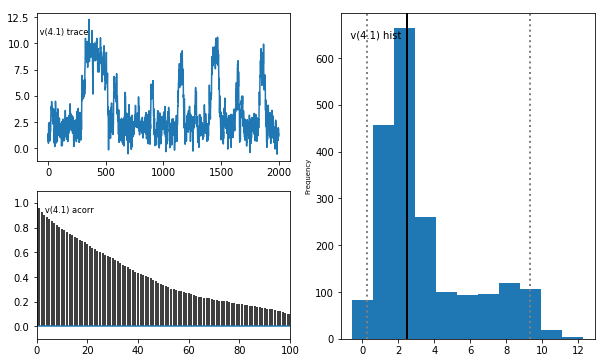

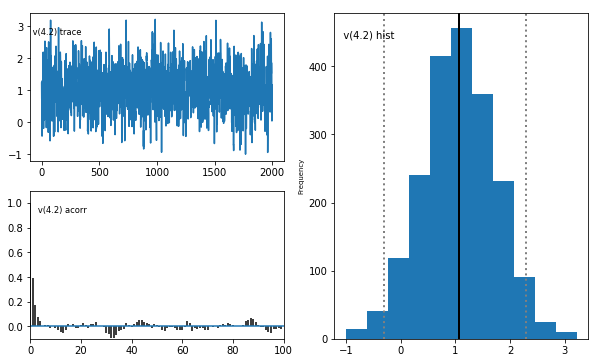

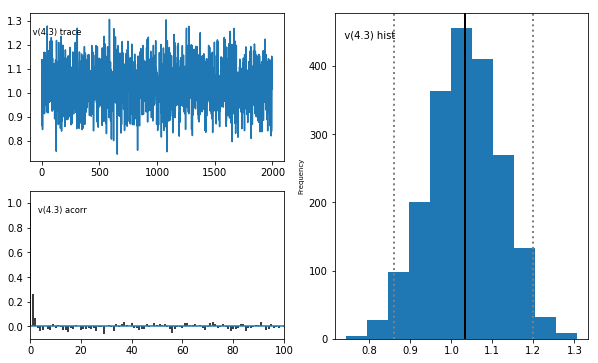

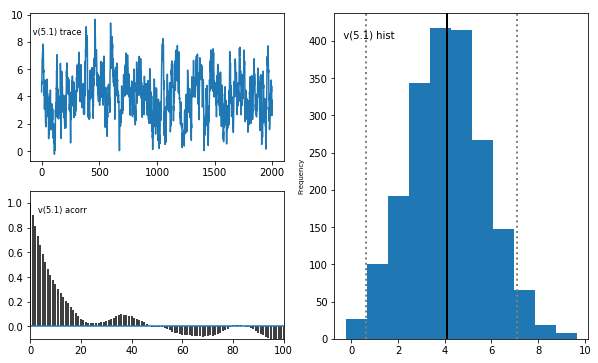

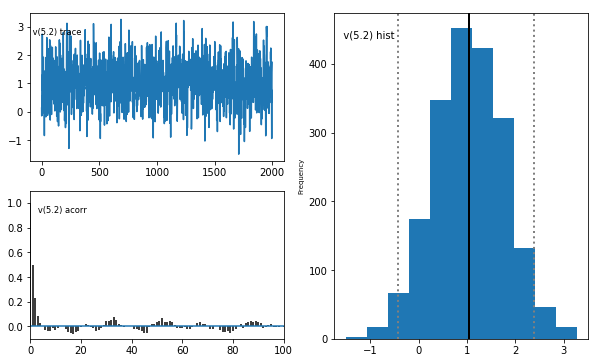

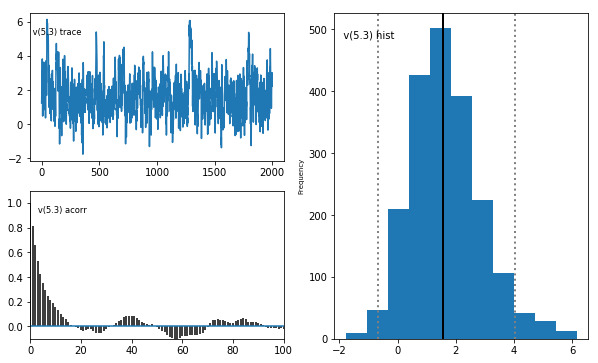

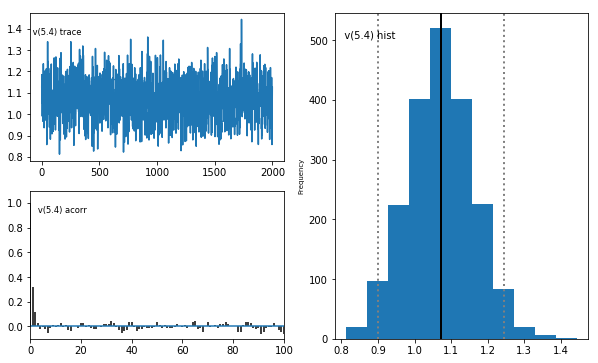

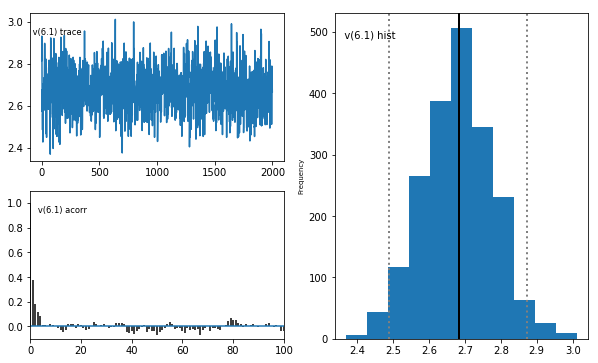

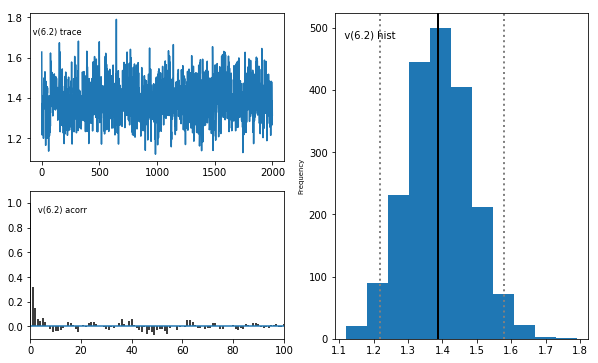

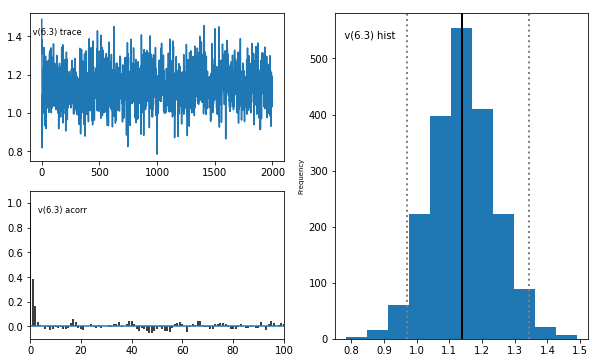

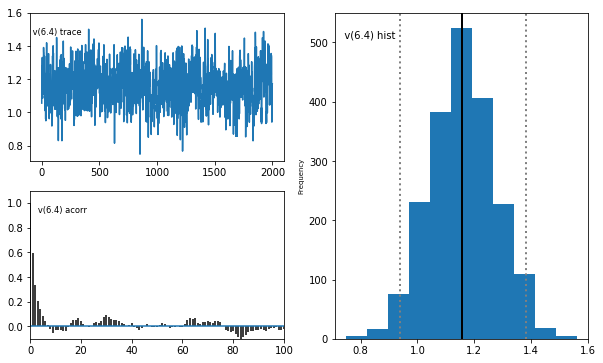

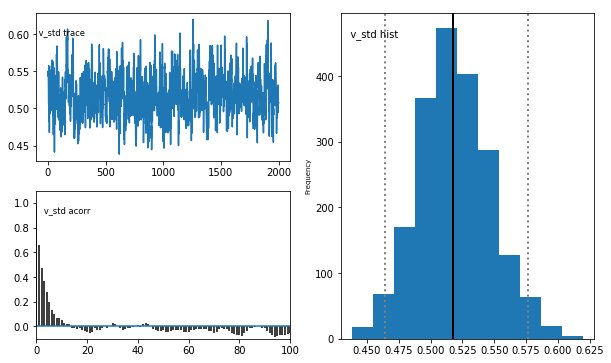

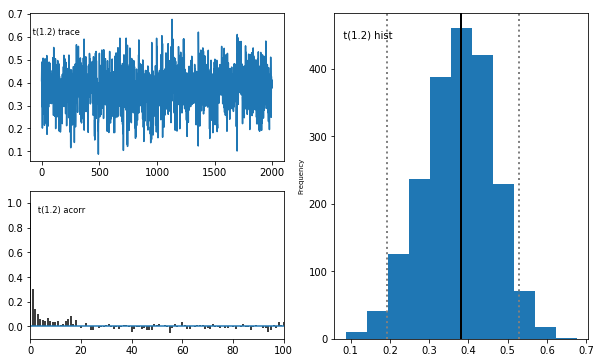

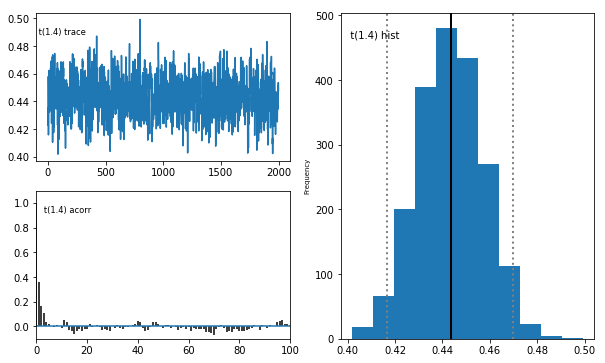

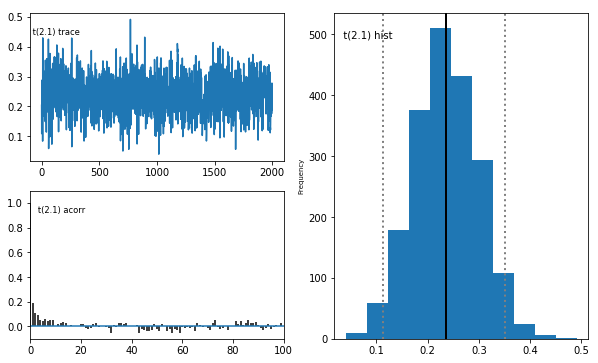

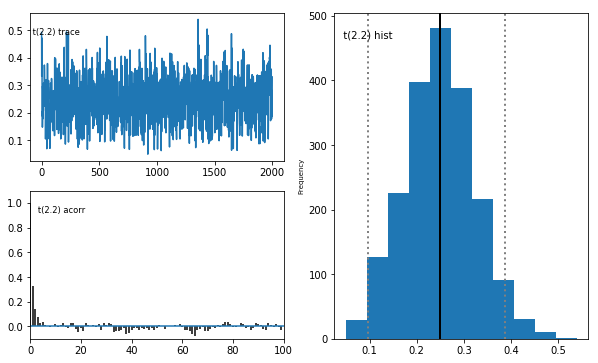

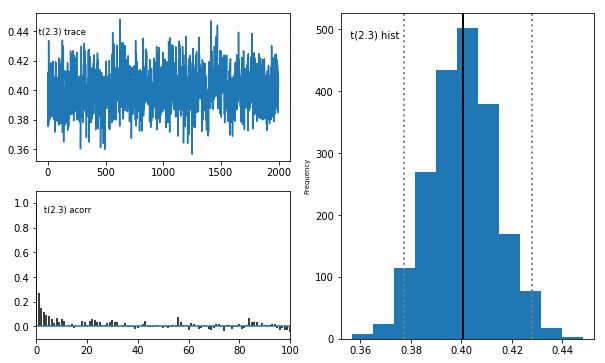

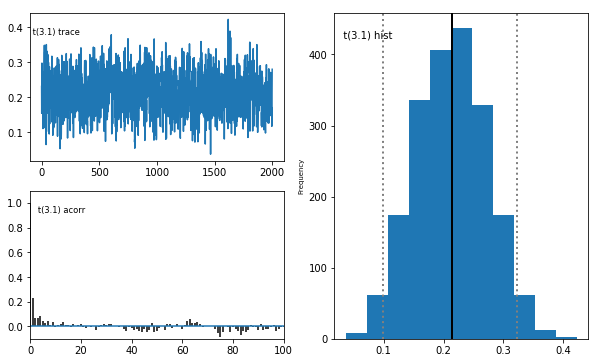

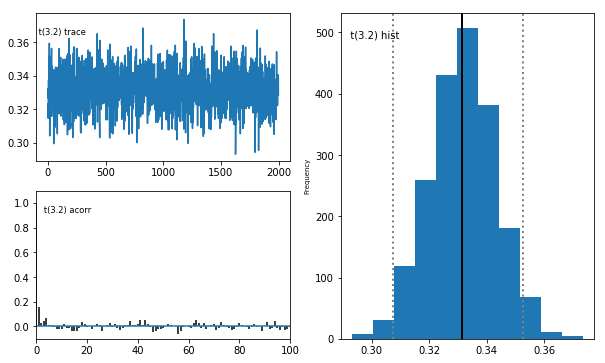

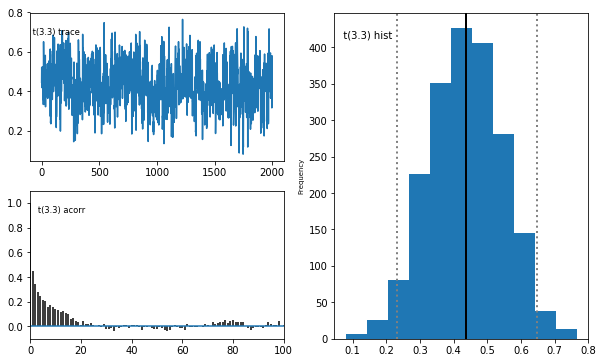

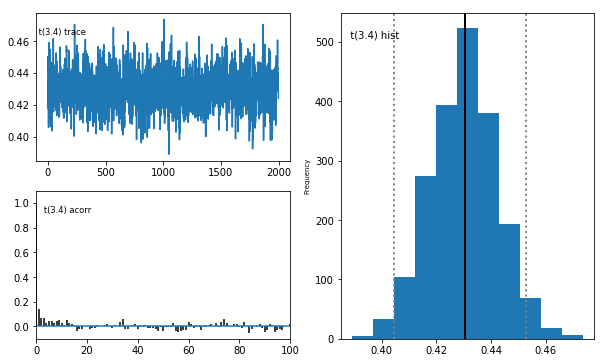

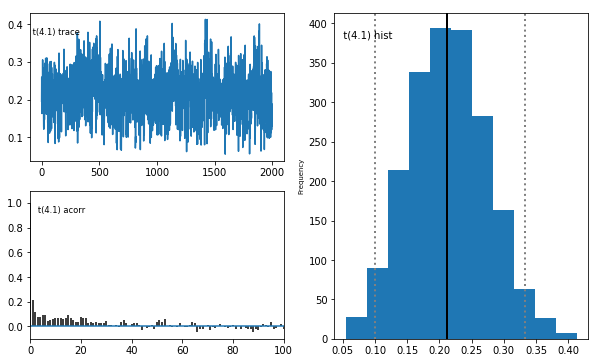

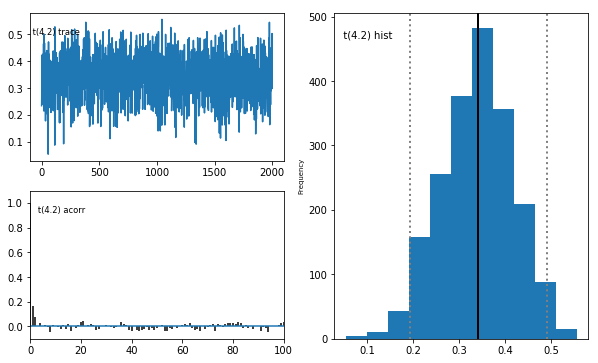

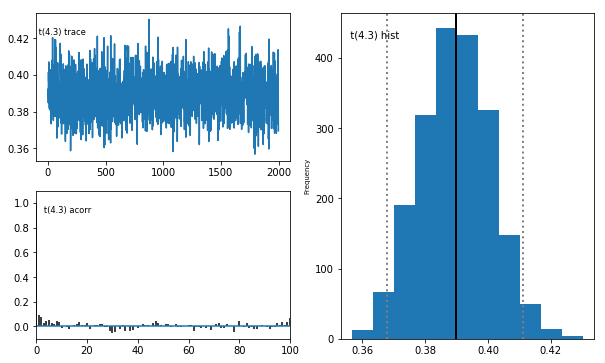

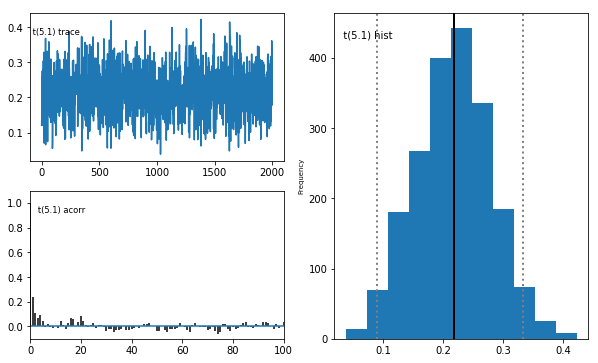

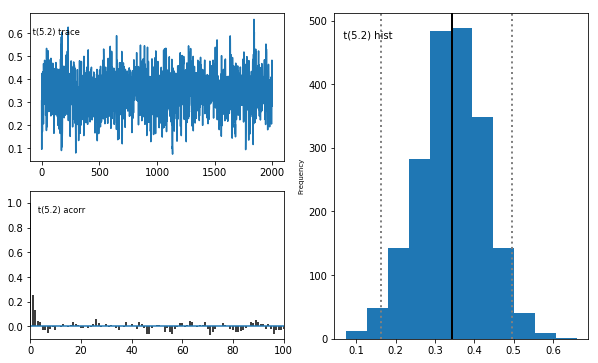

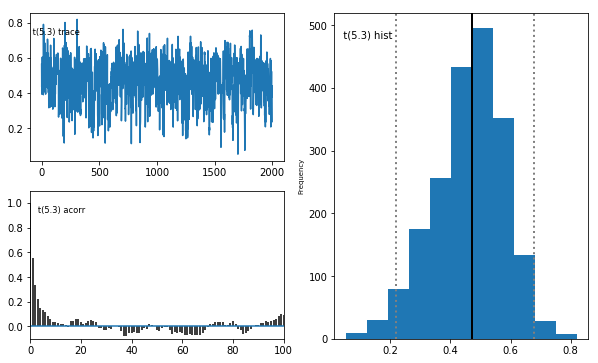

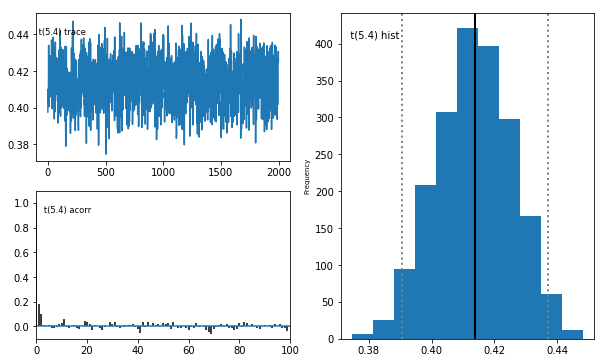

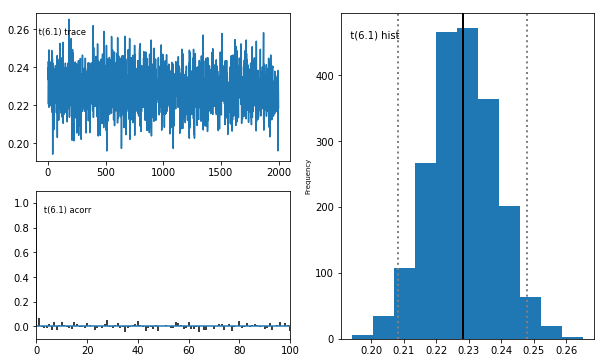

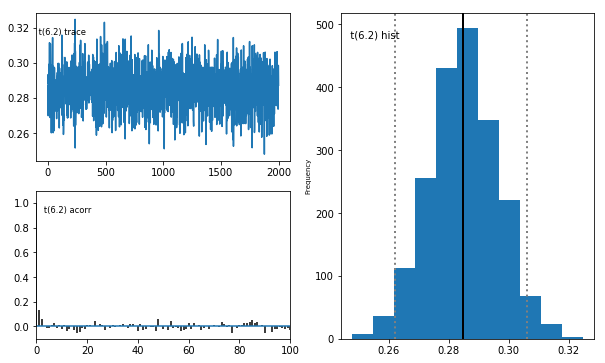

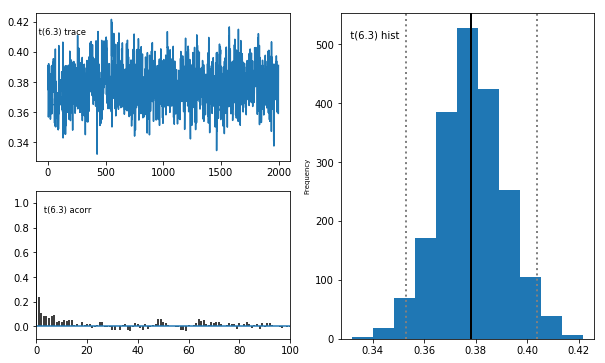

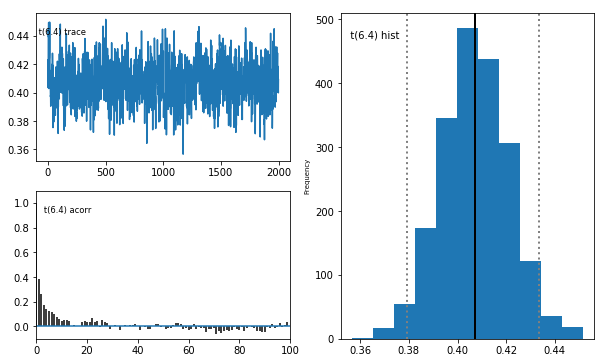

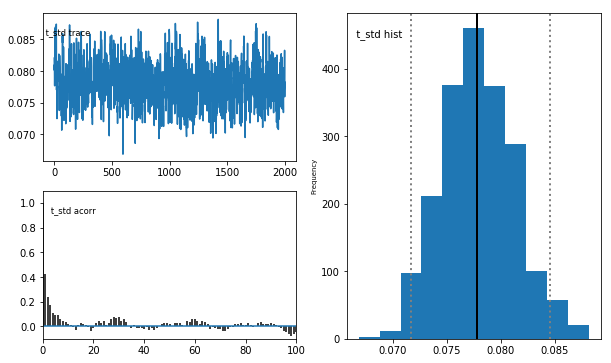

In [7]:
# posterior predictive check
m_dim_agree_v_t.plot_posterior_predictive()
m_dim_agree_v_t.plot_posteriors()

 [-----------------100%-----------------] 7001 of 7000 complete in 865.2 secModel m_L4_agree_v_t will be saved at: /Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/EEGAgree/m_L4_agree_v_t
Data will be saved at: /Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/EEGAgree/m_L4_agree_v_t.csv
Plotting a
Plotting a_std
Plotting v(1)
Plotting v(3)
Plotting v(5)
Plotting v(6)
Plotting v_std
Plotting t(1)
Plotting t(3)
Plotting t(5)
Plotting t(6)
Plotting t_std


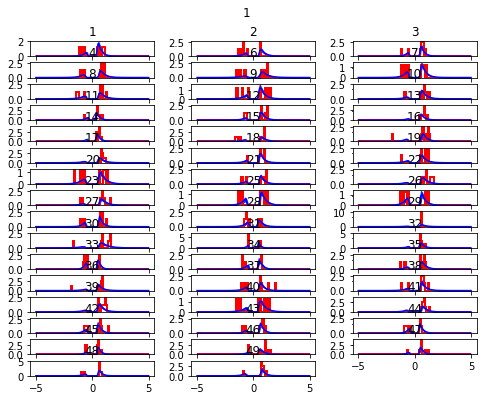

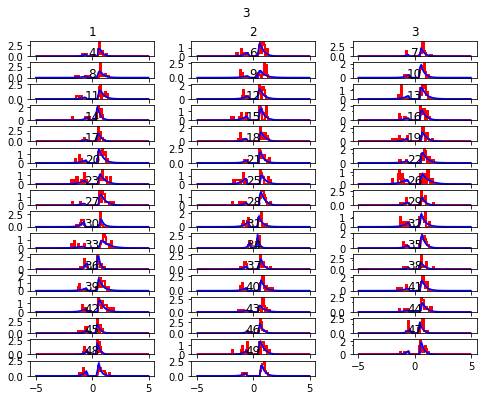

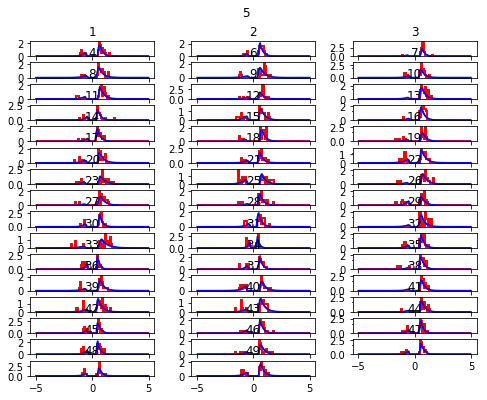

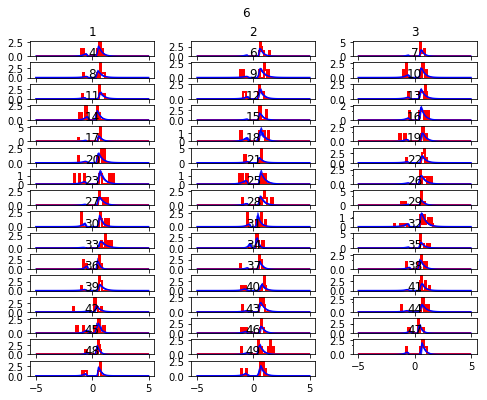

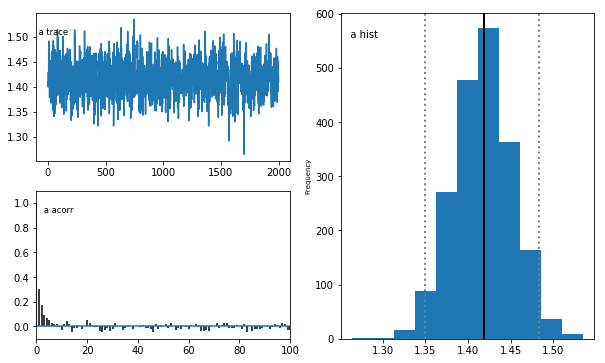

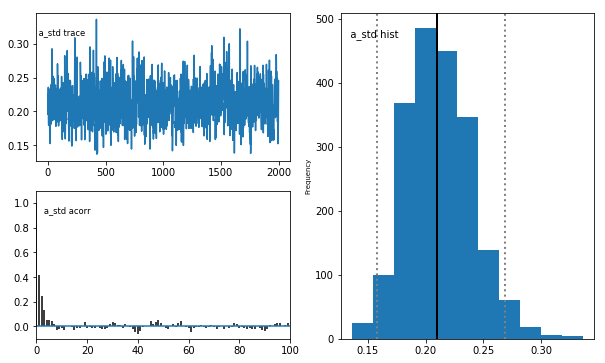

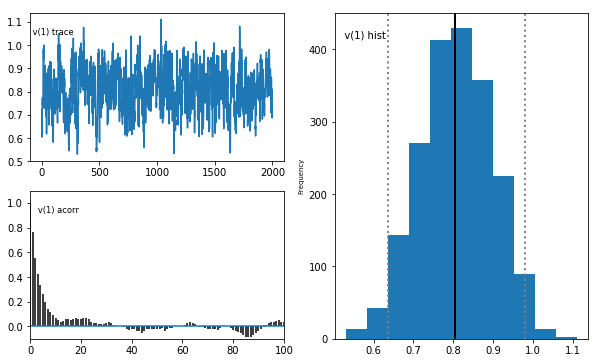

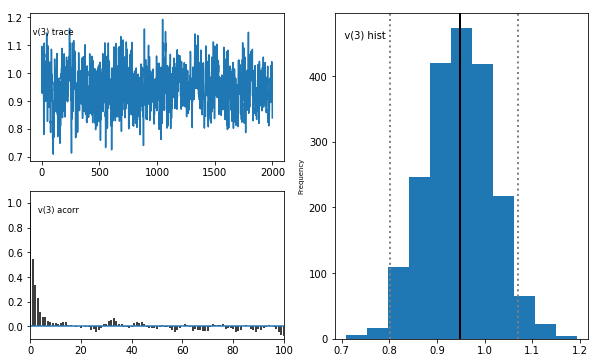

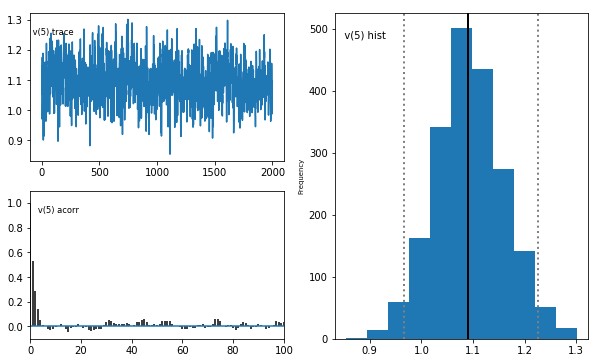

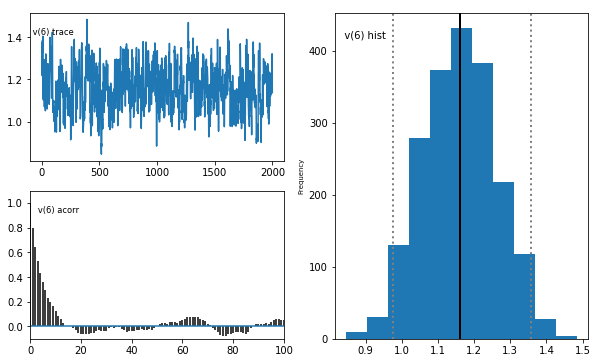

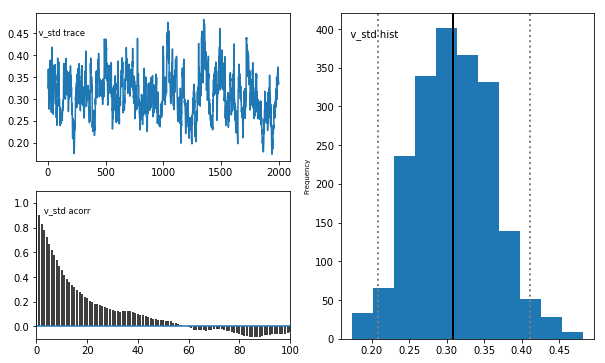

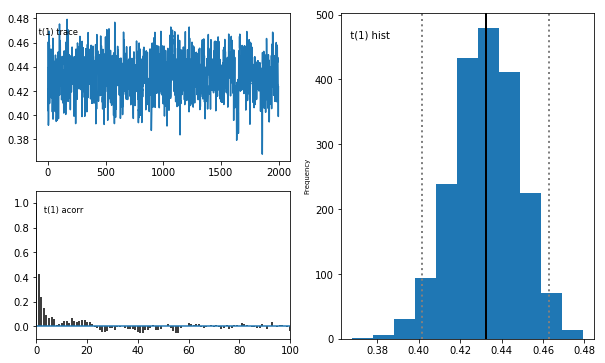

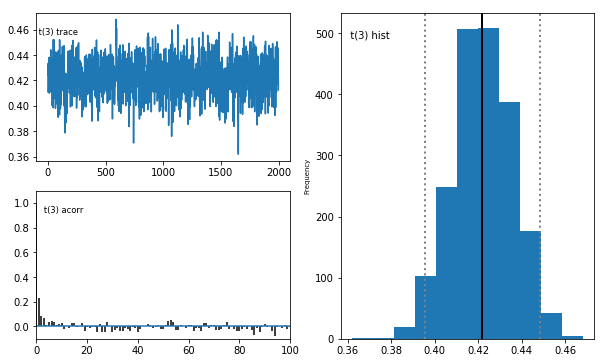

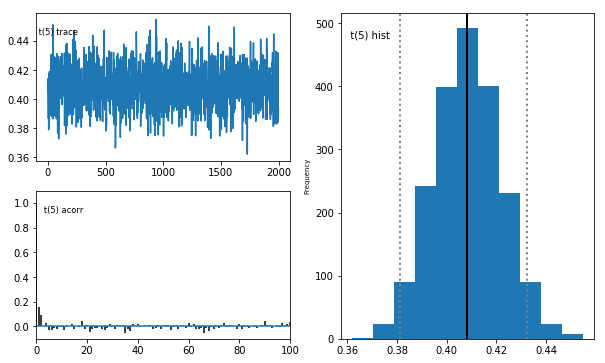

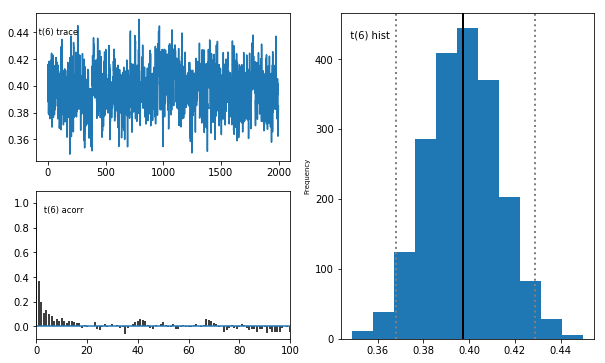

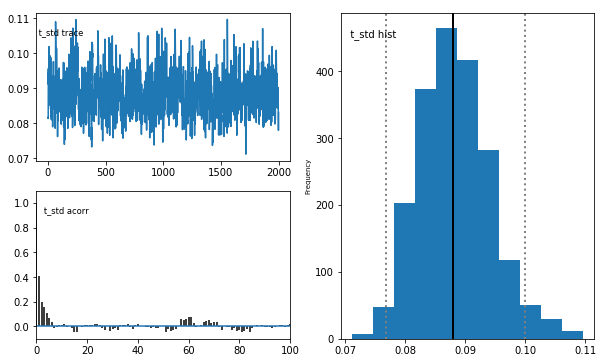

In [8]:
m_L4_agree_v_t = hddm.HDDM(data[is_l4], depends_on={'v': ['agree'], 't': ['agree']}, p_outlier=.05)
m_L4_agree_v_t.find_starting_values()
m_L4_agree_v_t.sample(7000, burn=5000, dbname='traces.db', db='pickle')
print('Model m_L4_agree_v_t will be saved at: '+ savePath+'m_L4_agree_v_t')
m_L4_agree_v_t.savePatch = savePatch(m_L4_agree_v_t, savePath+'m_L4_agree_v_t')
# save individual results as CSV
dataMat = m_L4_agree_v_t.get_traces()
fileName = 'm_L4_agree_v_t.csv'
print('Data will be saved at: '+ savePath+fileName)
dataMat.to_csv(savePath+fileName, sep='\t')

# posterior predictive check
m_L4_agree_v_t.plot_posterior_predictive()
m_L4_agree_v_t.plot_posteriors()

 [-----------------100%-----------------] 7000 of 7000 complete in 749.7 secModel m_agree_dim_v_t will be saved at: /Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/EEGAgree/m_agree_dim_v_t
Data will be saved at: /Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/EEGAgree/m_agree_dim_v_t.csv
Plotting a
Plotting a_std
Plotting v(1)
Plotting v(2)
Plotting v(3)
Plotting v(4)
Plotting v_std
Plotting t(1)
Plotting t(2)
Plotting t(3)
Plotting t(4)
Plotting t_std


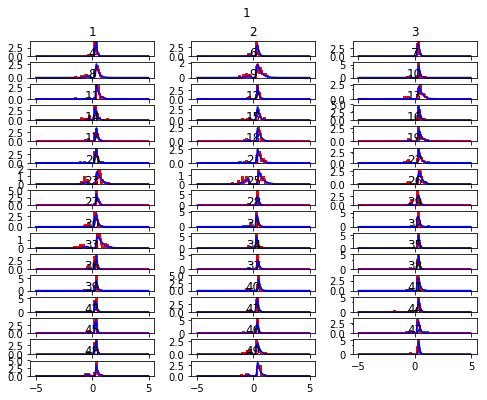

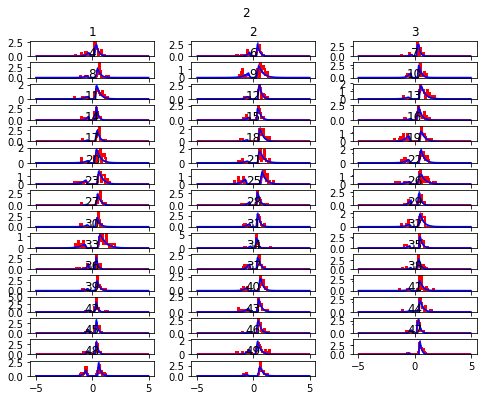

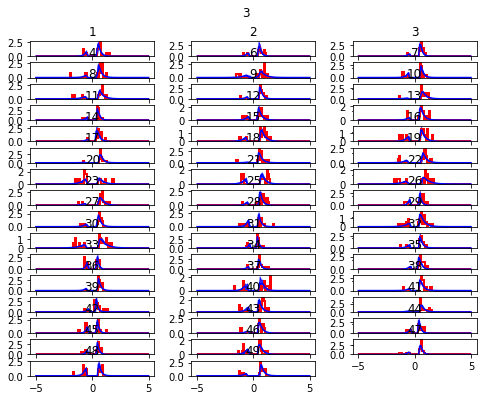

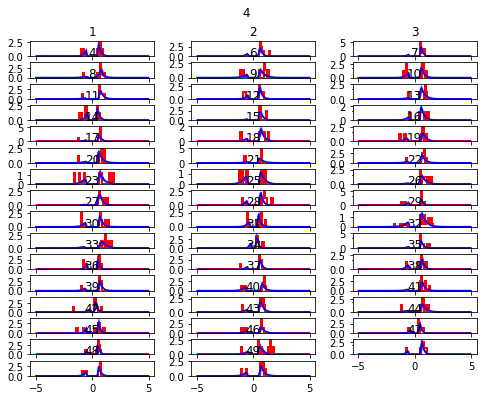

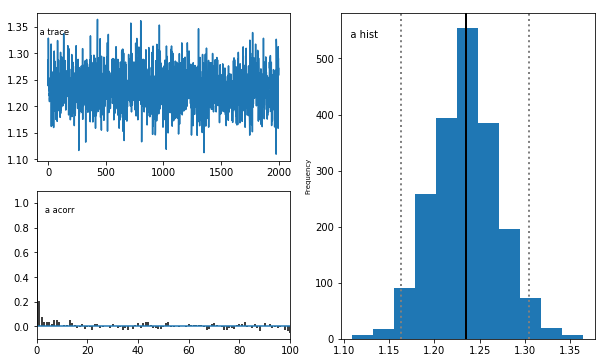

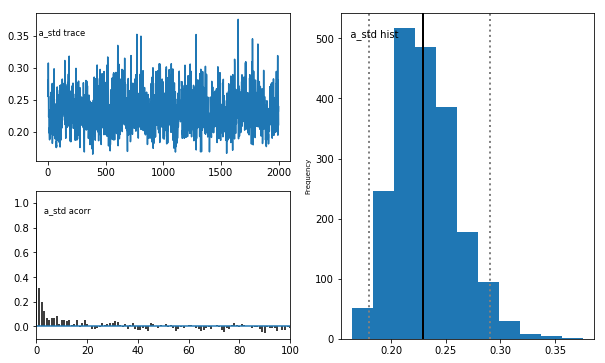

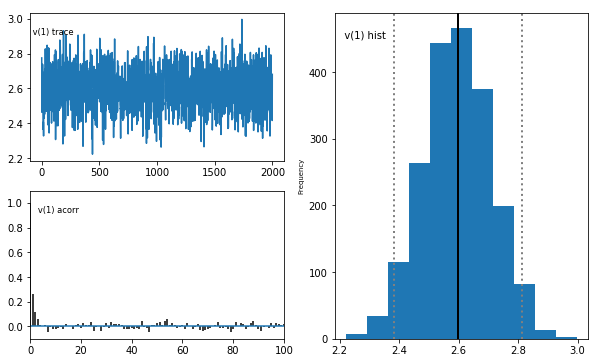

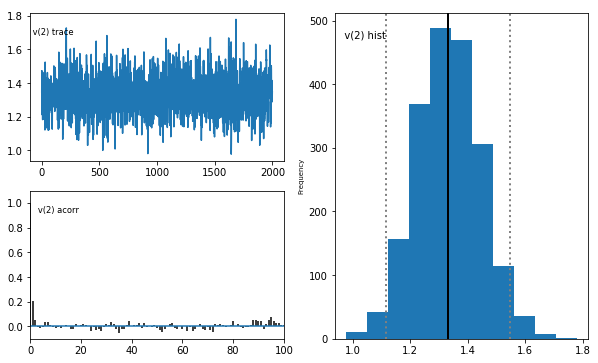

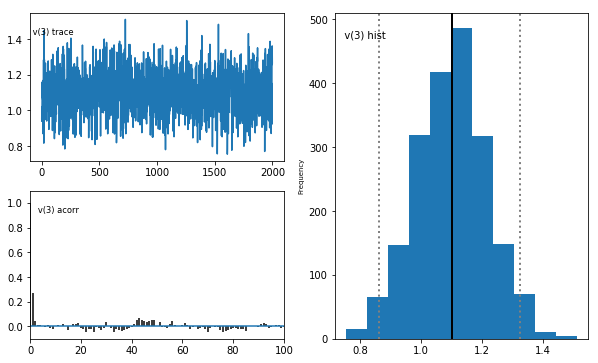

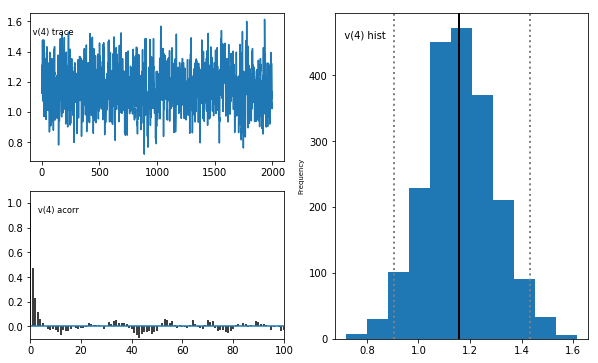

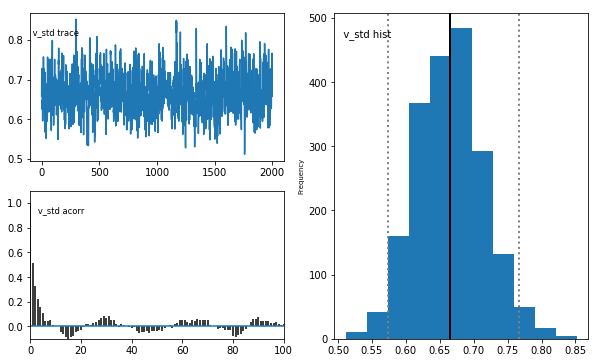

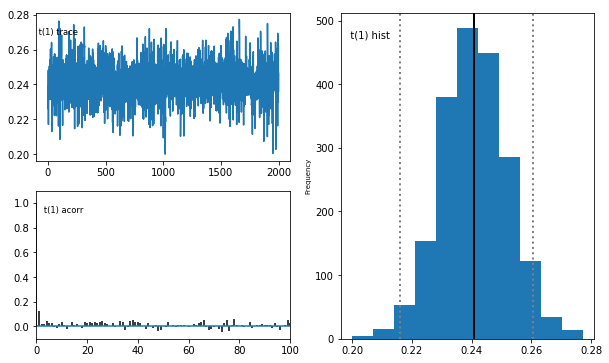

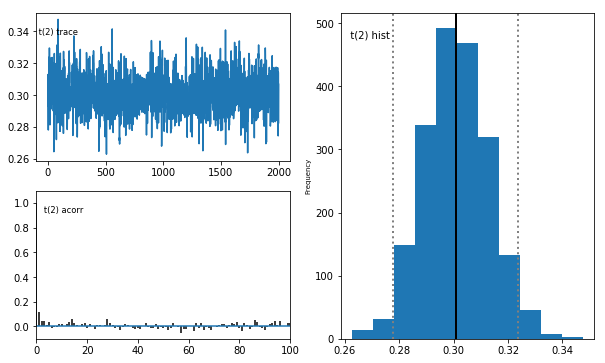

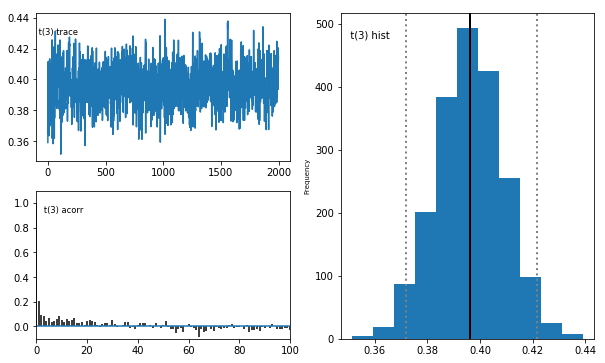

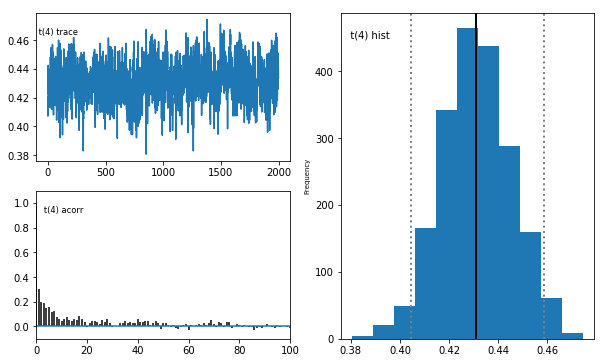

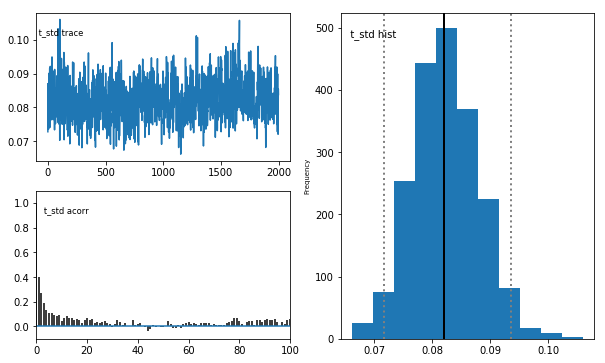

In [9]:
m_agree_dim_v_t = hddm.HDDM(data[data.agree == 6], depends_on={'v': ['dim'], 't': ['dim']}, p_outlier=.05)
m_agree_dim_v_t.find_starting_values()
m_agree_dim_v_t.sample(7000, burn=5000, dbname='traces.db', db='pickle')
print('Model m_agree_dim_v_t will be saved at: '+ savePath+'m_agree_dim_v_t')
m_agree_dim_v_t.savePatch = savePatch(m_agree_dim_v_t, savePath+'m_agree_dim_v_t')
# save individual results as CSV
dataMat = m_agree_dim_v_t.get_traces()
fileName = 'm_agree_dim_v_t.csv'
print('Data will be saved at: '+ savePath+fileName)
dataMat.to_csv(savePath+fileName, sep='\t')

# posterior predictive check
m_agree_dim_v_t.plot_posterior_predictive()
m_agree_dim_v_t.plot_posteriors()

In [10]:
print("Model m_dim_agree_v_t DIC: %f" % m_dim_agree_v_t.dic)

Model m_dim_agree_v_t DIC: 6426.443607
